In [1]:
%matplotlib inline

import numpy as np
import cProfile
import random
from SNN_test import *
from NN import *
from WAVreader import *
from copy import deepcopy
from random import shuffle
from scipy.io import wavfile
from scipy.fftpack import fft, dct
from pylab import *
from numpy import dot, outer
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

In [7]:
filelist = ['Audio/1-1.wav',
            'Audio/1-2.wav',
            'Audio/2-1.wav',
            'Audio/2-2.wav',
            'Audio/3-1.wav',
            'Audio/3-2.wav',
            'Audio/4-1.wav',
            'Audio/4-2.wav',
            'Audio/5-1.wav',
            'Audio/5-2.wav',
            'Audio/6-1.wav',
            'Audio/6-2.wav',
            'Audio/7-1.wav',
            'Audio/7-2.wav',
            'Audio/8-1.wav',
            'Audio/8-2.wav',
            'Audio/9-1.wav',
            'Audio/9-2.wav',
            ]
info = WAVreader(filelist, [-1,-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], 0.05)
data = info.concatset

14.4615
Scaled 1005 windows down to 751
Finished file Audio/1-1.wav
14.603
Scaled 1013 windows down to 763
Finished file Audio/1-2.wav
14.6035
Scaled 883 windows down to 756
Finished file Audio/2-1.wav
14.1525
Scaled 895 windows down to 789
Finished file Audio/2-2.wav
14.5955
Scaled 1285 windows down to 1004
Finished file Audio/3-1.wav
14.6025
Scaled 1176 windows down to 985
Finished file Audio/3-2.wav
14.6025
Scaled 806 windows down to 651
Finished file Audio/4-1.wav
13.49
Scaled 1574 windows down to 1159
Finished file Audio/4-2.wav
14.598
Scaled 891 windows down to 759
Finished file Audio/5-1.wav
14.601
Scaled 1504 windows down to 1161
Finished file Audio/5-2.wav
14.6035
Scaled 963 windows down to 821
Finished file Audio/6-1.wav
14.6025
Scaled 1321 windows down to 1081
Finished file Audio/6-2.wav
14.596
Scaled 1265 windows down to 1013
Finished file Audio/7-1.wav
14.596
Scaled 2184 windows down to 1721
Finished file Audio/7-2.wav
14.6015
Scaled 1154 windows down to 916
Finished file 

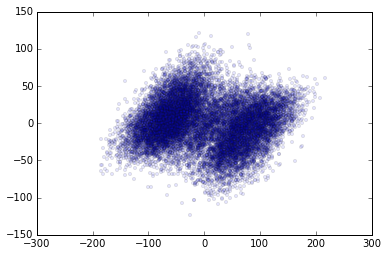

In [10]:
colors = ['red','blue','green','purple','orange','yellow','brown','black']

pull = info.concatset
X = [dat[0] for dat in pull]
labels = [(dat[1]+0.0)/info.length*2 for dat in info.concatset]
pca = PCA(n_components=2)
pca.fit(X)
newX = pca.transform(X)
figure()
for label in range(info.numClasses):
    series = [newX[i] for i in range(len(newX)) if pull[i][1]==label]
    scatter([x[0] for x in series], [x[1] for x in series],c=colors[label],alpha=0.1,s=10)
show()

In [8]:
trainset = []
testset = []
for i in xrange(len(data)):
    if i%10 == 2: testset.append(data[i])
    else: trainset.append(data[i])
print (len(data), len(testset))

(17656, 1766)


In [11]:
NTN = ShallowNeuralNetwork(input_dim=79, hidden_dim=27)
NTN.train(trainset, maxiter=201, alpha=0.0001, lmbda=0.00001, display_progress=True)

completed iteration 0; error is 4204.20648527; size is 3.46672216885
completed iteration 10; error is 1652.33224484; size is 13.1151046891
completed iteration 20; error is 1562.13521462; size is 15.2815964452
completed iteration 30; error is 1484.88107704; size is 16.9714003372
completed iteration 40; error is 1448.47328099; size is 18.0280862396
completed iteration 50; error is 1428.44900327; size is 18.7403369539
completed iteration 60; error is 1418.07962681; size is 19.2229670238
completed iteration 70; error is 1416.87277791; size is 19.5464623838
completed iteration 80; error is 1400.91669592; size is 19.8533826189
completed iteration 90; error is 1397.19418186; size is 20.0614867545
completed iteration 100; error is 1399.31377818; size is 20.2427616121
completed iteration 110; error is 1394.71603927; size is 20.5544640928
completed iteration 120; error is 1396.55514486; size is 20.6132101491
completed iteration 130; error is 1387.17782112; size is 20.5917670278
completed iterati

In [12]:
print NTN.accuracy(trainset), NTN.accuracy(testset)

0.946444304594 0.940543601359


In [4]:
SNN = SoftmaxNeuralNetwork(input_dim=79, output_dim=info.numClasses)
# print data[0][1]
# SNN.forward_propagation(data[0][0])
# print SNN.predictions
# SNN.backward_propagation(data[0][1])
SNN.train(trainset, maxiter=301, display_progress=True, anneal=lambda x: .01/(100+50*x))

completed iteration 0; error is 8036.0; size is 0.587986024359
completed iteration 10; error is 6490.0; size is 0.541806232862
completed iteration 20; error is 6238.0; size is 0.540736241239
completed iteration 30; error is 6169.0; size is 0.540027822522
completed iteration 40; error is 6058.0; size is 0.539519197108
completed iteration 50; error is 6108.0; size is 0.539140966605
completed iteration 60; error is 5976.0; size is 0.538898886218
completed iteration 70; error is 5943.0; size is 0.538696574379
completed iteration 80; error is 5984.0; size is 0.538521567074
completed iteration 90; error is 5941.0; size is 0.538379683384
completed iteration 100; error is 5924.0; size is 0.538245492705
completed iteration 110; error is 5959.0; size is 0.538152125996
completed iteration 120; error is 5924.0; size is 0.538053701665
completed iteration 130; error is 5870.0; size is 0.537962494943
completed iteration 140; error is 5903.0; size is 0.537878121751
completed iteration 150; error is 59

In [5]:
# 2-class, alpha=.001, lmbda=.0001, t=101
print SNN.accuracy(trainset), SNN.accuracy(testset)

0.463908184838 0.446557971014


Confusion matrix
[[ 71   8  27   7  22  16]
 [  7  59  21  14  55  33]
 [ 18   9 119  16  16  32]
 [  9   9  22  52  83  45]
 [  1  11   5   7 103  27]
 [  1  12  10  13  55  89]]


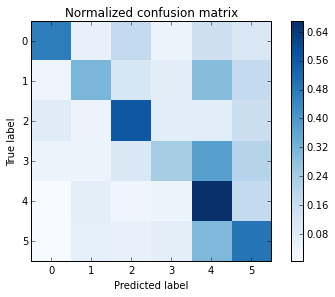

In [6]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

ytrue = []
ypred = []
for clip in testset:
    SNN.forward_propagation(clip[0])
    ypred.append(np.argmax(SNN.predictions))
    ytrue.append(np.argmax(clip[1]))
confusion=confusion_matrix(ytrue, ypred)
cm_normalized = confusion.astype('float') / confusion.sum(axis=1)[:, np.newaxis]
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [ ]:
#SIMPLE TIMER
cProfile.run("rate, x = wavfile.read('5-1.wav');")
print rate, len(x)

         34665 function calls (34281 primitive calls) in 0.040 seconds

   Random listing order was used

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 transforms.py:999(_get_minposy)
       10    0.000    0.000    0.000    0.000 cbook.py:363(__init__)
        1    0.000    0.000    0.000    0.000 figure.py:99(bubble)
      197    0.000    0.000    0.000    0.000 {method 'itervalues' of 'dict' objects}
       20    0.000    0.000    0.000    0.000 artist.py:261(get_transform)
       16    0.000    0.000    0.000    0.000 ticker.py:390(__init__)
        2    0.000    0.000    0.000    0.000 fromnumeric.py:53(take)
    81/78    0.000    0.000    0.000    0.000 {hash}
       10    0.000    0.000    0.000    0.000 cbook.py:495(connect)
       95    0.000    0.000    0.000    0.000 text.py:1020(set_text)
        2    0.000    0.000    0.000    0.000 lines.py:542(set_axes)
      3/2    0.000    0.000    0.000    0.000 tr

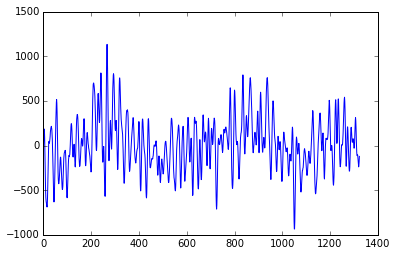

In [28]:
#MORE COMPLEX TIMER - BUT POSSIBLY CAN EXTRACT INFO INTO VARIABLES
import cProfile, pstats, StringIO
pr = cProfile.Profile()
pr.enable()
pr.run("rate, x = wavfile.read('5-1.wav');")
pr.disable()
s = StringIO.StringIO()
ps = pstats.Stats(pr, stream=s).strip_dirs()
ps.print_stats()
print s.getvalue()